### Exercise 11
Consider a 2-dimensional data set in which all points with $x_1$ >$x_2$ belong to the positive class, and all points with $x_1$ ≤ $x_2$ belong to the negative class. Therefore, the true separator of the two classes is linear hyperplane (line) defined by $x_1$ − $x_2$ =0. Now create a training data set with 20 points randomly generated inside the unit square in the positive quadrant. Label each point depending on whether or not the first coordinate $x_1$ is greater than its second coordinate $x_2$

 - Implement the perceptron algorithm without regularization, train it on the 20 points above, and test its accuracy on 1000 randomly generated points inside the unit square. Generate the test points using the same procedure as the training points.
 - Change the perceptron criterion to hinge-loss in your implementation for training, and repeat the accuracy computation on the same test points above. Regularization is not used.
 - In which case do you obtain better accuracy and why?
 - In which case do you think that the classification of the same 1000 test instances will not change significantly by using a different set of 20 training points?
#### Answer
I obtain better accuracy on perceptron criterion, i think because the hinge loss made too many update of the weigths considering that for the examples of training the probability to be near the margin is the same to be away from it. Assuming this is true, i create a new dataset where there isn't example near the margin and train both model on this new training: the opposite occurs, hinge perform better than perceptron criterion.
### Code

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron

In [203]:
def create_dataset(n):
    x=np.empty((0,2))
    y=np.empty(0)
    for i in range(n):
        example=np.random.random(2)
        if example[0]>example[1]:
            y=np.append(y,-1)
        else:
            y=np.append(y,1)
        x=np.append(x, np.array([example]), axis=0)
    return x, y

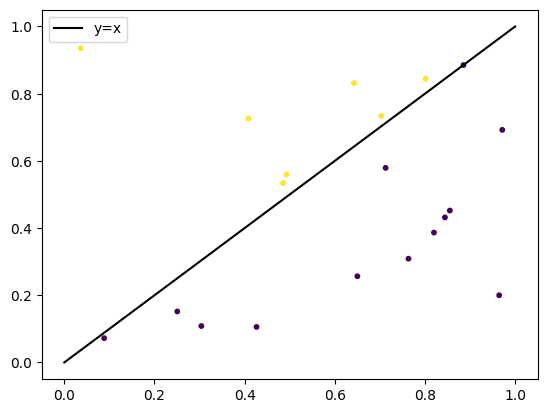

In [204]:
x_train, y_train=create_dataset(20)
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=10)  # punti colorati
separat,= plt.plot([0,1], [0,1], 'k-', label='y=x')                            # retta nera
plt.legend(handles=[separat])
plt.show;

In [205]:
p_no_hinge=Perceptron(x_train=x_train, y_train=y_train)
p_no_hinge.train()

Perpectron makes a wrong prediciton 174.0 and it has has accuracy of 0.826


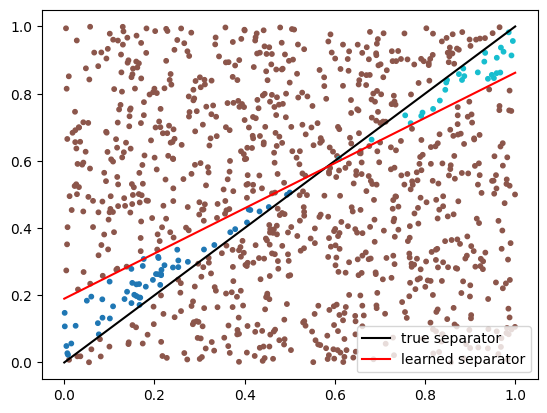

In [206]:
x_test, y_test=create_dataset(1000)
y_test_predict=p_no_hinge.predict_more(x_test)
n_error=p_no_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_predict-y_test, cmap='tab10', s=10)
true_separat,= plt.plot([0,1], [0,1], 'k-', label='true separator')                           
x_val=[0,1]
if p_no_hinge.bias:
    y_val=[(-p_no_hinge.w[0]*x-p_no_hinge.w[2])/p_no_hinge.w[1] for x in x_val]
else:
    y_val=[(-p_no_hinge.w[0]*x)/p_no_hinge.w[1] for x in x_val]
learned_separat,= plt.plot(x_val, y_val, 'r-', label='learned separator')           
plt.legend(handles=[true_separat, learned_separat])
plt.show;
print("Perpectron makes a wrong prediciton" ,n_error,"and it has has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])

Perpectron makes a wrong prediciton 248.0 -times and it has accuracy of 0.752


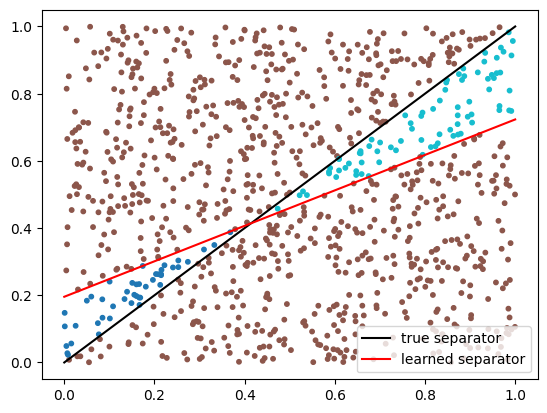

In [207]:
p_hinge=Perceptron(x_train=x_train, y_train=y_train)
p_hinge.train(hinge=True)
y_test_predict_hinge=p_hinge.predict_more(x_test)
n_error=p_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_predict_hinge-y_test, cmap='tab10', s=10)  # punti colorati
true_separat,= plt.plot([0,1], [0,1], 'k-', label='true separator')                           
x_val=[0,1]
y_val=[(-p_hinge.w[0]*x-p_hinge.w[2])/p_hinge.w[1] for x in x_val]
learned_separat,= plt.plot(x_val, y_val, 'r-', label='learned separator')           
plt.legend(handles=[true_separat, learned_separat])
plt.show;
print("Perpectron makes a wrong prediciton" ,n_error,"-times and it has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])

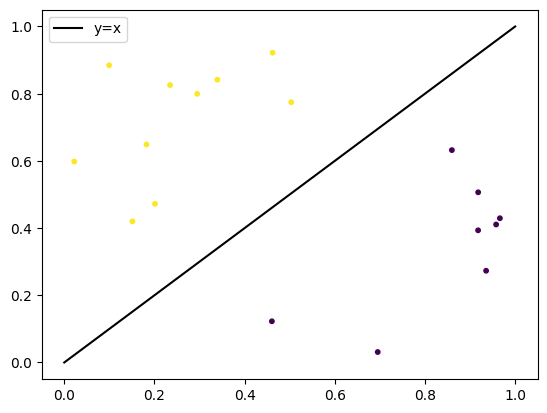

In [208]:
x_train=np.empty((0,2))
y_train=np.empty(0)
while np.sum(y_train == 1)<10 or np.sum(y_train == 1)<10:
    example=np.random.random(2)
    if example[0]-example[1]>0.2:
        if np.sum(y_train == -1)==10:
            continue
        y_train=np.append(y_train,-1)
    elif example[0]-example[1]<-0.2:
        if np.sum(y_train == 1)==10:
            continue
        y_train=np.append(y_train,1)
    else:
        continue
    x_train=np.append(x_train, np.array([example]), axis=0)
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=10)  # punti colorati
separat,= plt.plot([0,1], [0,1], 'k-', label='y=x')                            # retta nera
plt.legend(handles=[separat])
plt.show;

In [209]:
p_no_hinge=Perceptron(x_train=x_train, y_train=y_train)
p_no_hinge.train()

Perpectron makes a wrong prediciton 228.0 and it has has accuracy of 0.772


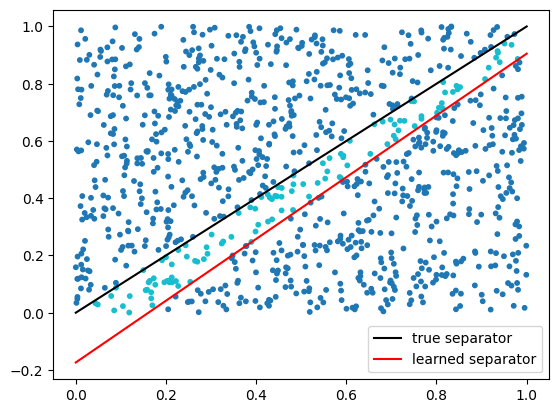

In [210]:
x_test, y_test=create_dataset(1000)
y_test_predict=p_no_hinge.predict_more(x_test)
n_error=p_no_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_predict-y_test, cmap='tab10', s=10)
true_separat,= plt.plot([0,1], [0,1], 'k-', label='true separator')                           
x_val=[0,1]
if p_no_hinge.bias:
    y_val=[(-p_no_hinge.w[0]*x-p_no_hinge.w[2])/p_no_hinge.w[1] for x in x_val]
else:
    y_val=[(-p_no_hinge.w[0]*x)/p_no_hinge.w[1] for x in x_val]
learned_separat,= plt.plot(x_val, y_val, 'r-', label='learned separator')           
plt.legend(handles=[true_separat, learned_separat])
plt.show;
print("Perpectron makes a wrong prediciton" ,n_error,"and it has has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])

Perpectron makes a wrong prediciton 52.0 -times and it has accuracy of 0.948


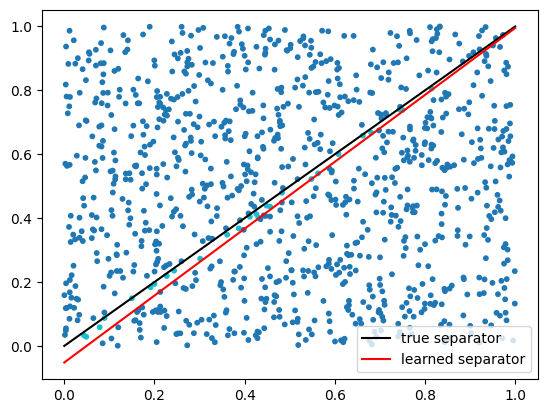

In [211]:
p_hinge=Perceptron(x_train=x_train, y_train=y_train)
p_hinge.train(hinge=True)
y_test_predict_hinge=p_hinge.predict_more(x_test)
n_error=p_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_predict_hinge-y_test, cmap='tab10', s=10)  # punti colorati
true_separat,= plt.plot([0,1], [0,1], 'k-', label='true separator')                           
x_val=[0,1]
y_val=[(-p_hinge.w[0]*x-p_hinge.w[2])/p_hinge.w[1] for x in x_val]
learned_separat,= plt.plot(x_val, y_val, 'r-', label='learned separator')           
plt.legend(handles=[true_separat, learned_separat])
plt.show;
print("Perpectron makes a wrong prediciton" ,n_error,"-times and it has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])